<a href="https://colab.research.google.com/github/YatindraRai002/Email-Classification/blob/main/Hackerrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier

In [11]:
df= pd.read_csv('/content/emails.csv')

In [24]:
df.size

15526344

In [12]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
1034,Email 1035,18,19,18,18,3,6,143,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1035,Email 1036,4,5,3,0,2,2,19,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,Email 1037,0,1,1,1,0,0,6,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1037,Email 1038,3,2,1,1,0,1,11,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1038,Email 1039,11,7,11,11,16,0,98,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

In [27]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [28]:
df.dtypes

,0
Email No.,object
the,int64
to,int64
ect,int64
and,int64
...,...
military,int64
allowing,int64
ff,int64
dry,int64


In [29]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [23]:

df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9546
Precision: 0.8903
Recall: 0.9595
F1 Score: 0.9236


In [35]:
 df.loc[df['Prediction'] == 'spam', 'Prediction',] = 0
 df.loc[df['Prediction'] == 'ham', 'Prediction',] = 1

In [36]:
df['Prediction'].value_counts()

,count
Prediction,
0,3672
1,1500


In [38]:
X = df.drop(['Email No.', 'Prediction'], axis=1)

Y = df['Prediction']

In [39]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [40]:
Y

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
5167,0
5168,0
5169,1
5170,1


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [42]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5172, 3000)
(4137, 3000)
(1035, 3000)


**LOGISTIC REGRESSION**

In [47]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)


lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)


lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)


lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)


print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.9847715736040609
Testing Data Accuracy : 0.9758454106280193
Precision             : 0.9452054794520548
Recall                : 0.968421052631579
F1 Score              : 0.9566724436741768


**NAIVE BAYES**

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

mnb_train = mnb.predict(X_train)
mnb_test = mnb.predict(X_test)

mnb_train_acc = accuracy_score(Y_train, mnb_train)
mnb_test_acc = accuracy_score(Y_test, mnb_test)

mnb_precision = precision_score(Y_test, mnb_test)
mnb_recall = recall_score(Y_test, mnb_test)
mnb_f1 = f1_score(Y_test, mnb_test)

print("Multinomial Naive Bayes:\n")
print("Training Data Accuracy:", mnb_train_acc)
print("Testing Data Accuracy :", mnb_test_acc)

print("Precision             :", mnb_precision)
print("Recall                :", mnb_recall)
print("F1 Score              :", mnb_f1)

Multinomial Naive Bayes:

Training Data Accuracy: 0.9446458786560309
Testing Data Accuracy : 0.9439613526570049
Precision             : 0.8580441640378549
Recall                : 0.9543859649122807
F1 Score              : 0.9036544850498339


In [54]:
train_acc_list = {"LR":lr_train_acc, "MNB":mnb_train_acc}

test_acc_list = {"LR":lr_test_acc, "MNB":mnb_test_acc}

precision_list = {"LR":lr_precision, "MNB":mnb_precision}

recall_list = {"LR":lr_recall, "MNB":mnb_recall}

f1_list = {"LR":lr_f1, "MNB":mnb_f1}

In [55]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])

org = pd.concat([a1, a2, a3, a4, a5], axis = 1)
display(org)

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.984772,0.975845,0.945205,0.968421,0.956672
MNB,0.944646,0.943961,0.858044,0.954386,0.903654


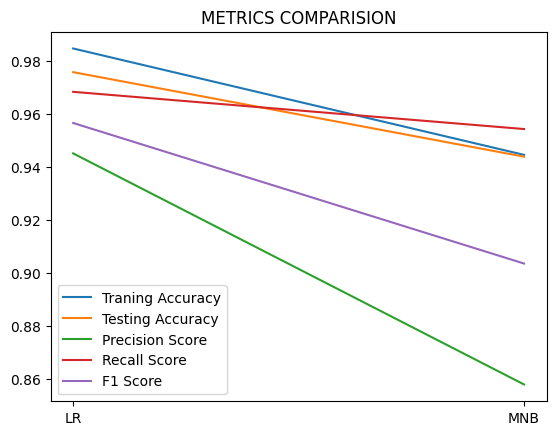

In [56]:
alg = ['LR', 'MNB']  # Include both LR and MNB
plt.plot(alg, a1.values.flatten())
plt.plot(alg, a2.values.flatten())
plt.plot(alg, a3.values.flatten())
plt.plot(alg, a4.values.flatten())
plt.plot(alg, a5.values.flatten())

legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()